In [18]:
#importing the necessary libraries
library(mvtnorm)
library(ggplot2) 
library(reshape2)

In [19]:
#Loading the necessary datasets
train.1e = read.csv("assignment1_datasets/Task1E_train.csv")
test.1e= read.csv("assignment1_datasets/Task1E_test.csv")

#Number of classes
D <- 2

#training classes
train.data <- train.1e[, 1:D]

#train label
train.label <- train.1e[3]

#testing data
test.data <-test.1e[, 1:D]

##testing label
test.label <- test.1e[3]

#number of rows in training data
train.len = nrow(train.data)
sample_size = seq(5,train.len,5)

In [20]:
##Question 7 I

## Initialization
N <- 1000
c0 <- '+1'; c1 <- '-1' # class labels
mu0 <- c(4.5, 0.5); p0 <- 0.60
mu1 <- c(1.0, 4.0); p1 <- 1 - p0
sigma <- matrix(c(1, 0, 0, 1), nrow=2, ncol=2, byrow = TRUE) # shared covariance matrix
sigma0 <- sigma;   sigma1 <- sigma

In [7]:
data <- data.frame(x1=double(), x2=double(), label=factor(levels = c(c0,c1))) # empty data.frame

## Generate class labels
data[1:N,'label'] <- sample(c(c0,c1), N, replace = TRUE, prob = c(p0, p1))

## calculate the size of each class
N0 <- sum(data[1:N,'label']==c0); N1 <- N - N0

## Sample from the Gaussian distribution accroding to the class labels and statitics.
data[data[1:N,'label']==c0, c('x1', 'x2')] <- rmvnorm(n = N0, mu0, sigma0)
data[data[1:N,'label']==c1, c('x1', 'x2')] <- rmvnorm(n = N1, mu1, sigma1)

## Split data to train and test datasets
train.len <- round(N/2)
train.index <- sample(1:N, train.len, replace = FALSE)
train.data <- data[train.index, c('x1', 'x2')]
test.data <- data[-train.index, c('x1', 'x2')]
train.label <- data[train.index, 'label']
test.label <- data[-train.index, 'label']

In [8]:
# Class probabilities:
p0.hat <- sum(train.label==c0)/nrow(train.data) # total number of samples in class 0 divided by the total nmber of training data
p1.hat <- sum(train.label==c1)/nrow(train.data) # or simply 1 - p1.hat

cat(sprintf('\nThe real class probabilities:\t\t%f, %f\nThe estimated class probabilities:\t%f, %f\n', p0, p1, p0.hat, p1.hat))


The real class probabilities:		0.600000, 0.400000
The estimated class probabilities:	0.612000, 0.388000


In [9]:
# Class means:
mu0.hat <- colMeans(train.data[train.label==c0,])
mu1.hat <- colMeans(train.data[train.label==c1,])

cat(sprintf('\nThe real class means:\t\t%f, %f\t%f, %f\t\nThe estimated class means:\t%f, %f\t%f, %f\t\n', 
          mu0[1], mu0[2], mu1[1], mu1[2],
          mu0.hat[1], mu0.hat[2], mu1.hat[1], mu1.hat[2]))


The real class means:		4.500000, 0.500000	1.000000, 4.000000	
The estimated class means:	4.428505, 0.489038	0.998266, 3.985889	


In [10]:
# class covariance matrices:
sigma0.hat <- var(train.data[train.label==c0,])
sigma1.hat <- var(train.data[train.label==c1,])

# shared covariance matrix:
sigma.hat <- p0.hat * sigma0.hat + p1.hat * sigma1.hat 

cat(sprintf('\nThe real class covariance matrix:\n\t%f, %f\n\t%f, %f\nThe estimated covariance matrix:\n\t%f, %f\n\t%f, %f\n', 
          sigma[1], sigma[2], sigma[3], sigma[4],
          sigma.hat[1], sigma.hat[2], sigma.hat[3], sigma.hat[4]))


The real class covariance matrix:
	1.000000, 0.000000
	0.000000, 1.000000
The estimated covariance matrix:
	0.972097, -0.048513
	-0.048513, 1.021049


In [11]:
# calculate posteriors:
posterior0 <- p0.hat*dmvnorm(x=train.data, mean=mu0.hat, sigma=sigma.hat)
posterior1 <- p1.hat*dmvnorm(x=train.data, mean=mu1.hat, sigma=sigma.hat)

In [12]:
# Data Generation
## Libraries:
library(mvtnorm) # generates multivariate Gaussian sampels and calculate the densities
library(ggplot2)
library(reshape2)
## Initialization
set.seed(123)
N <- 1000
c0 <- '+1'; c1 <- '-1' # class labels
mu0 <- c(4.5, 0.5); p0 <- 0.60
mu1 <- c(1.0, 4.0); p1 <- 1 - p0
sigma <- matrix(c(1, 0, 0, 1), nrow=2, ncol=2, byrow = TRUE) # shared covariance matrix
sigma0 <- sigma;   sigma1 <- sigma
data <- data.frame(x1=double(), x2=double(), label=factor(levels = c(c0,c1))) # empty data.frame
## Generate class labels
data[1:N,'label'] <- sample(c(c0,c1), N, replace = TRUE, prob = c(p0, p1))
## calculate the size of each class
N0 <- sum(data[1:N,'label']==c0); N1 <- N - N0
## Sample from the Gaussian distribution accroding to the class labels and statitics.
data[data[1:N,'label']==c0, c('x1', 'x2')] <- rmvnorm(n = N0, mu0, sigma0)
data[data[1:N,'label']==c1, c('x1', 'x2')] <- rmvnorm(n = N1, mu1, sigma1)
## Split data to train and test datasets
train.len <- round(N/2)
train.index <- sample(1:N, train.len, replace = FALSE)
train.data <- data[train.index, c('x1', 'x2')]; train.label <- data[train.index, 'label']
test.data <- data[-train.index, c('x1', 'x2')]; test.label <- data[-train.index, 'label']

In [13]:
# auxiliary function that predicts class labels
predict <- function(w, X, c0, c1){
    sig <- sigmoid(w, X)
    return(ifelse(sig>0.5, c1,c0))
}
    
# auxiliary function that calculate a cost function
cost <- function (w, X, T, c0){
    sig <- sigmoid(w, X)
    return(sum(ifelse(T==c0, 1-sig, sig)))
}

In [14]:
# Sigmoid function (=p(C1|X))
sigmoid <- function(w, x){
    return(1.0/(1.0+exp(-w%*%t(cbind(1,x)))))    
}

In [15]:
# Initializations
tau.max <- 1000 # maximum number of iterations
eta <- 0.01 # learning rate
epsilon <- 0.01 # a threshold on the cost (to terminate the process)
tau <- 1 # iteration counter
terminate <- FALSE

## Just a few name/type conversion to make the rest of the code easy to follow
X <- as.matrix(train.data) # rename just for conviniance
T <- ifelse(train.label==c0,0,1) # rename just for conviniance

W <- matrix(,nrow=tau.max, ncol=(ncol(X)+1)) # to be used to store the estimated coefficients
W[1,] <- runif(ncol(W)) # initial weight (any better idea?)

# project data using the sigmoid function (just for convenient)
Y <- sigmoid(W[1,],X)

costs <- data.frame('tau'=1:tau.max)  # to be used to trace the cost in each iteration
costs[1, 'cost'] <- cost(W[1,],X,T, c0)

In [16]:
while(!terminate){
    # check termination criteria:
    terminate <- tau >= tau.max | cost(W[tau,],X,T, c0)<=epsilon
    
    # shuffle data:
    train.index <- sample(1:train.len, train.len, replace = FALSE)
    X <- X[train.index,]
    T <- T[train.index]
    
    # for each datapoint:
    for (i in 1:train.len){
        # check termination criteria:
        if (tau >= tau.max | cost(W[tau,],X,T, c0) <=epsilon) {terminate<-TRUE;break}
        
        Y <- sigmoid(W[tau,],X)
            
        # Update the weights
        W[(tau+1),] <- W[tau,] - eta * (Y[i]-T[i]) * cbind(1, t(X[i,]))
        
        # record the cost:
        costs[(tau+1), 'cost'] <- cost(W[tau,],X,T, c0)
        
        # update the counter:
        tau <- tau + 1
        
        # decrease learning rate:
        eta = eta * 0.999
    }
}
# Done!
costs <- costs[1:tau, ] # remove the NaN tail of the vector (in case of early stopping)

# the  final result is:
w <- W[tau,]
cat('\nThe  final coefficents are:',w)


The  final coefficents are: 0.3049571 -1.072479 1.047804

In [21]:
##Question 7 II

set.seed(32350260)
## Bayseian Classification
train_error_bayesian <-vector()
test_error_bayesian <- vector()
for(i in 1:length(sample_size))
{
k = sample_size[i]    
train_data <- train.data[1:k,]
train_label <- train.label[1:k,]
test_data <- test.data[1:k,]
test_label <- test.label[1:k,]

# Class probabilities:    
p0.hat <- sum(train_label==c0)/nrow(train_data) # total number of samples in class 0 divided by the total nmber of training data
p1.hat <- sum(train_label==c1)/nrow(train_data) # or simply 1 - p1.hat

# Class means:
mu0.hat <- colMeans(train_data[train_label==c0,])
mu1.hat <- colMeans(train_data[train_label==c1,])

# class covariance matrices:
sigma0.hat <- var(train_data[train_label==c0,])
sigma1.hat <- var(train_data[train_label==c1,])

# shared covariance matrix:
sigma.hat <- p0.hat * sigma0.hat + p1.hat * sigma1.hat

# calculate posteriors:
posterior0 <- p0.hat*dmvnorm(x=train_data, mean=mu0.hat, sigma=sigma.hat)
posterior1 <- p1.hat*dmvnorm(x=train_data, mean=mu1.hat, sigma=sigma.hat)

# calculate predictions:
train.predict <- ifelse(posterior0 > posterior1, c0, c1)
test.predict <- ifelse(p0.hat*dmvnorm(x=test_data, mean=mu0.hat, sigma=sigma.hat) > p1.hat*dmvnorm(x=test_data, mean=mu1.hat, sigma=sigma.hat), c0, c1)

#Calculating the errors    
train_error_bayesian[i] <- 1 - (sum(train_label==train.predict)/nrow(train_data))
test_error_bayesian[i] <- 1 - (sum(test_label==test.predict)/nrow(test_data))    
}


In [22]:
#Displaying the training bayesian errors
train_error_bayesian

[1] 0.8000000 0.7000000 0.5333333 0.5500000 0.6400000 0.6666667 0.7142857
  [8] 0.7000000 0.7111111 0.7000000 0.7090909 0.6833333 0.6923077 0.7000000
 [15] 0.7200000 0.7250000 0.6941176 0.6666667 0.6736842 0.6800000 0.6857143
 [22] 0.6909091 0.6869565 0.6750000 0.6640000 0.6692308 0.6740741 0.6642857
 [29] 0.6689655 0.6733333 0.6709677 0.6750000 0.6848485 0.6882353 0.6857143
 [36] 0.6888889 0.6864865 0.6894737 0.6923077 0.6950000 0.6975610 0.6952381
 [43] 0.6976744 0.7000000 0.6933333 0.7000000 0.7021277 0.7000000 0.7020408
 [50] 0.7040000 0.6980392 0.6923077 0.6943396 0.6925926 0.6872727 0.6857143
 [57] 0.6877193 0.6793103 0.6813559 0.6733333 0.6688525 0.6709677 0.6730159
 [64] 0.6781250 0.6738462 0.6696970 0.6716418 0.6676471 0.6608696 0.6628571
 [71] 0.6676056 0.6666667 0.6630137 0.6594595 0.6613333 0.6631579 0.6675325
 [78] 0.6666667 0.6708861 0.6725000 0.6740741 0.6707317 0.6698795 0.6666667
 [85] 0.6658824 0.6627907 0.6620690 0.6613636 0.6584270 0.6577778 0.6549451
 [92] 0.6543478 0.6559140 0.6574468 0.6568421 0.6562500 0.6597938 0.6632653
 [99] 0.6606061 0.6600000

In [23]:
# auxiliary function that predicts class labels
predict <- function(w, X, c0, c1){
    sig <- sigmoid(w, X)
    return(ifelse(sig>0.5, c1,c0))
}
    
# auxiliary function that calculate a cost function
cost <- function (w, X, T, c0){
    sig <- sigmoid(w, X)
    return(sum(ifelse(T==c0, 1-sig, sig)))
}

In [24]:
# Sigmoid function (=p(C1|X))
sigmoid <- function(w, x){
    return(1.0/(1.0+exp(-w%*%t(cbind(1,x)))))    
}

In [25]:
tau.max <- 1000 # maximum number of iterations
eta <- 0.01 # learning rate
epsilon <- 0.01 # a threshold on the cost (to terminate the process)

In [26]:
set.seed(32350260)
train_error_log <-vector()
test_error_log <- vector()
for(i in 1:length(sample_size)){
k = sample_size[i]    
train_data1 <- train.data[1:k,]
train_label1 <- train.label[1:k,]
test_data1 <- test.data[1:k,]
test_label1 <- test.label[1:k,]
tau <- 1 # iteration counter
terminate <- FALSE
train.length<-nrow(train_data1)

## Just a few name/type conversion to make the rest of the code easy to follow
X <- as.matrix(train_data1) # rename just for conviniance
T <- ifelse(train_label1==c0,0,1) # rename just for conviniance

W <- matrix(,nrow=tau.max, ncol=(ncol(X)+1)) # to be used to store the estimated coefficients
W[1,] <- runif(ncol(W)) # initial weight (any better idea?)

# project data using the sigmoid function (just for convenient)
Y <- sigmoid(W[1,],X)

costs <- data.frame('tau'=1:tau.max)  # to be used to trace the cost in each iteration
costs[1, 'cost'] <- cost(W[1,],X,T, c0)



while(!terminate){
    # check termination criteria:
    terminate <- tau >= tau.max | cost(W[tau,],X,T, c0)<=epsilon
   
    # shuffle data:
    train.index <- sample(1:train.length, train.length, replace = FALSE)
    X <- X[train.index,]
    T <- T[train.index]
   
    # for each datapoint:
    for (j in 1:train.length){
        # check termination criteria:
        if (tau >= tau.max | cost(W[tau,],X,T, c0) <=epsilon) {terminate<-TRUE;break}
       
        Y <- sigmoid(W[tau,],X)
           
        # Update the weights
        W[(tau+1),] <- W[tau,] - eta * (Y[j]-T[j]) * cbind(1, t(X[j,]))
       
        # record the cost:
        costs[(tau+1), 'cost'] <- cost(W[tau,],X,T, c0)
       
        # update the counter:
        tau <- tau + 1
       
        # decrease learning rate:
        eta = eta * 0.999
    }
}
    costs <- costs[1:tau, ] # remove the NaN tail of the vector (in case of early stopping)

    # the  final result is:
    w <- W[tau,]
   
    train_predict<-predict(w,train_data1,c0,c1)
    test_predict<-predict(w,test_data1,c0,c1)
   
    train_error_log[i]<- 1 - (sum(train_label1==train_predict)/nrow(train_data1))
    test_error_log[i]<- 1 - (sum(test_label1==test_predict)/nrow(test_data1))

}

In [27]:
## Merging common errors
train_error <- data.frame(sample_size,train_error_log,train_error_bayesian)
test_error <- data.frame(sample_size,test_error_log,test_error_bayesian)

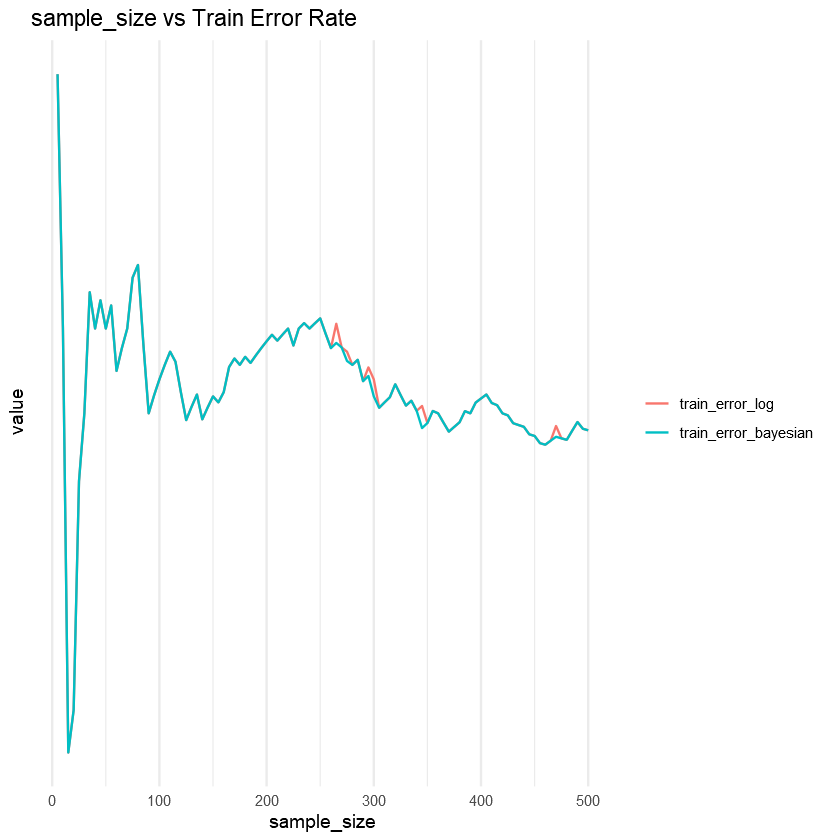

In [28]:
#Plotting training errors 
melt_train_error = melt(train_error,id='sample_size')

ggplot(data=melt_train_error, aes(x=sample_size, y=value, color=variable)) + geom_line() +
scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
ggtitle("sample_size vs Train Error Rate ")+ scale_y_continuous(breaks = NULL)

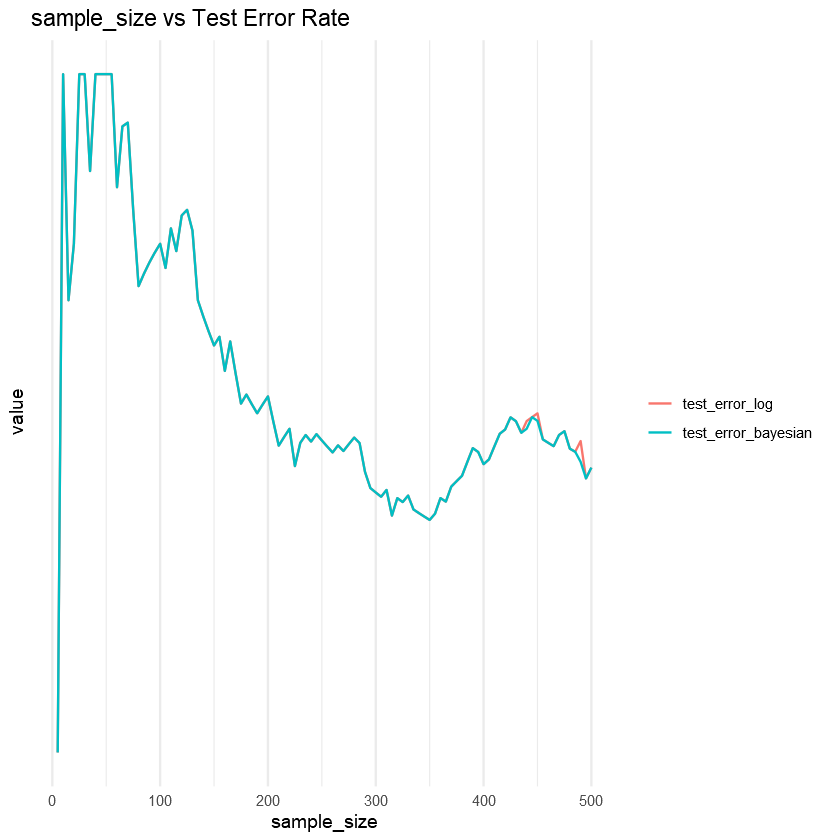

In [69]:
#Plotting testing errors 
melt_test_error = melt(test_error,id='sample_size')

ggplot(data=melt_test_error, aes(x=sample_size, y=value, color=variable)) + geom_line() +
scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
ggtitle("sample_size vs Test Error Rate ")+ scale_y_continuous(breaks = NULL)